# Predicting House Prices with Linear Regression

## Introduction

This project aims to develop a predictive model using linear regression to estimate house prices based on relevant features from the dataset. Linear regression is a simple yet powerful machine learning algorithm, making it a great starting point for understanding predictive modeling.

## Project Overview

The project will follow these key steps:
1. **Data Collection**: Load the dataset containing house price information and relevant features.
2. **Data Exploration and Cleaning**: Explore the dataset to understand its structure, handle missing values, and ensure data quality.
3. **Feature Selection**: Identify key features that contribute to house price prediction.
4. **Model Training**: Build a linear regression model to predict house prices.
5. **Model Evaluation**: Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.
6. **Visualization**: Create visualizations to interpret the relationship between the predicted and actual house prices.

This step-by-step process will help us gain hands-on experience in predictive modeling using linear regression.


## Step 1: Data Collection

In this step, we will load the dataset that contains the house price information and relevant features. The dataset will be read into a pandas DataFrame for further exploration and analysis.


In [10]:
import pandas as pd

file_path = 'E:\DA\Projects\Oasis Infobyte\Project 5\Housing.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 2: Data Exploration and Cleaning

### Overview:

In this step, we will explore the dataset to understand its structure and quality. Specifically, we will:
1. Check the data types of each column.
2. Identify any missing values that need to be handled.


In [11]:
# Check the data types of each column
df.info()

# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the missing values
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Insights from Data Exploration

1. **No Missing Values**: The dataset contains no missing values in any of the columns. This is beneficial as we don’t need to impute or remove any data due to missing entries.
2. **Data Types**: 
   - There are 6 numerical columns (`price`, `area`, `bedrooms`, `bathrooms`, `stories`, `parking`) that can be used directly in the model.
   - There are 7 categorical columns (`mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, `furnishingstatus`) which will need to be converted to numerical form for our linear regression model.
3. **Next Steps**: We will now convert these categorical variables into numerical representations using one-hot encoding to prepare the data for modeling.


### Handling Categorical Data

Many columns in the dataset are categorical (e.g., `mainroad`, `guestroom`). These need to be converted into numerical values for our linear regression model. We'll encode these categorical variables using `LabelEncoder` or `pd.get_dummies` to prepare them for modeling.


In [12]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


### Insights from Handling Categorical Data

1. **Categorical Encoding**: We successfully converted the categorical variables into numerical format using one-hot encoding. The resulting dataset now has new columns representing the different categories for `mainroad`, `guestroom`, `basement`, `hotwaterheating`, `airconditioning`, `prefarea`, and `furnishingstatus`.
2. **New Columns**: For each categorical variable, binary columns were created. For example, `mainroad_yes`, `guestroom_yes`, `basement_yes`, etc., represent whether a house has these features.
3. **Next Steps**: We will proceed with selecting the relevant features for building the linear regression model.


## Step 3: Feature Selection

In this step, we will identify the relevant features that contribute to predicting house prices. Our target variable is `price`, and we will use the remaining columns as features for our model.


In [13]:
# Define the target variable (house prices)
y = df_encoded['price']

# Define the features (all columns except 'price')
X = df_encoded.drop(columns=['price'])

# Display the first few rows of the features and target variable
X.head(), y.head()


(   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
 0  7420         4          2        3        2          True          False   
 1  8960         4          4        4        3          True          False   
 2  9960         3          2        2        2          True          False   
 3  7500         4          2        2        3          True          False   
 4  7420         4          1        2        2          True           True   
 
    basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
 0         False                False                 True          True   
 1         False                False                 True         False   
 2          True                False                False          True   
 3          True                False                 True          True   
 4          True                False                 True         False   
 
    furnishingstatus_semi-furnished  furnishingstatus_unfurn

### Insights from Feature Selection

1. **Target Variable**: Our target variable for the linear regression model is the `price` column, which contains the house prices.
2. **Features**: The features used for prediction include numerical variables like `area`, `bedrooms`, `bathrooms`, `stories`, and `parking`, as well as encoded categorical variables like `mainroad_yes`, `guestroom_yes`, `basement_yes`, and others.
3. **Next Steps**: We will now proceed to train a linear regression model using these selected features.


## Step 4: Model Training

In this step, we will implement a linear regression model using the Scikit-Learn library to predict house prices. We will split the dataset into training and testing sets, train the model on the training set, and evaluate its performance on the test set.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the coefficients and intercept of the model
model.coef_, model.intercept_


(array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
         2.24841913e+05,  3.67919948e+05,  2.31610037e+05,  3.90251176e+05,
         6.84649885e+05,  7.91426736e+05,  6.29890565e+05, -1.26881818e+05,
        -4.13645062e+05]),
 260032.35760741215)

### Insights from Model Training

1. **Coefficients**: The coefficients represent the weight or influence each feature has on predicting house prices. For example:
   - The coefficient for `area` is 235.97, indicating that for every unit increase in area, the predicted house price increases by approximately 236 units, keeping other factors constant.
   - The coefficient for `bedrooms` is 76,778, meaning each additional bedroom is associated with an increase in house price by approximately 76,778 units.
   - The categorical features like `airconditioning_yes` and `basement_yes` also have notable coefficients, showing the impact of these features on the house price.
2. **Intercept**: The model's intercept is approximately 260,032. This is the baseline value when all features are zero (though in reality, some features like `area` and `bedrooms` cannot be zero).
3. **Next Steps**: We will now proceed with evaluating the model’s performance on the test dataset to understand how well it predicts house prices.


## Step 5: Model Evaluation

In this step, we will evaluate the linear regression model by predicting house prices on the test dataset and calculating performance metrics such as Mean Squared Error (MSE) and R-squared (R²).


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
mse, r2


(1754318687330.6643, 0.6529242642153184)

### Insights from Model Evaluation

1. **Mean Squared Error (MSE)**: The MSE is approximately 1.75 trillion (1,754,318,687,330). MSE represents the average of the squared differences between the actual and predicted house prices. A large MSE indicates that the model has significant errors in predicting house prices. Given the high magnitude of house prices, it is expected that the MSE is quite large, but we may want to refine the model or use different features to reduce this error.
   
2. **R-squared (R²)**: The R² value is 0.65, meaning that 65% of the variance in house prices is explained by the features in the model. While this is a reasonable result, it indicates there is still room for improvement, as 35% of the variance is not captured by the model.
   
3. **Next Steps**: We can improve the model by exploring advanced techniques such as feature engineering, removing outliers, or using other regression techniques. However, for this basic linear regression model, we have gained a solid understanding of how well the model predicts house prices.


## Step 7: Visualization

In this step, we will create a scatter plot to visualize the relationship between actual house prices and predicted house prices, helping us understand how well the model performs.


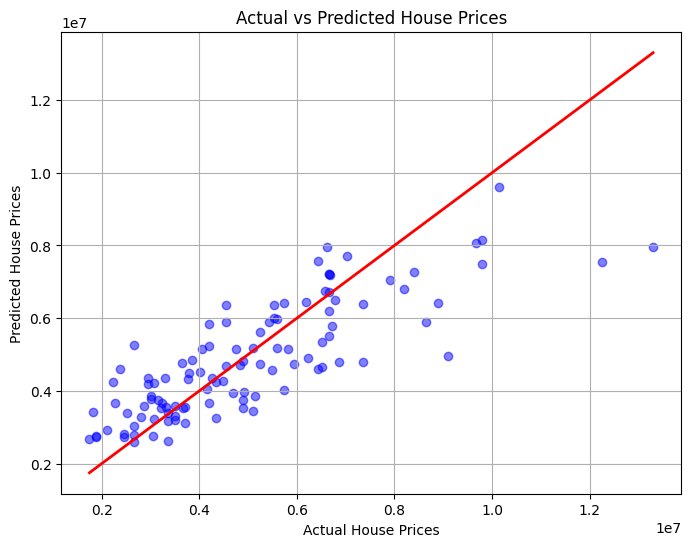

In [16]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted house prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line for perfect prediction
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


In [17]:
# Create a DataFrame to compare actual and predicted house prices
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the comparison
comparison_df.head(20)


,Actual,Predicted
316,4060000,5.164654e+06
77,6650000,7.224722e+06
360,3710000,3.109863e+06
90,6440000,4.612075e+06
493,2800000,3.294646e+06
209,4900000,3.532275e+06
176,5250000,5.611775e+06
249,4543000,6.368146e+06
516,2450000,2.722857e+06
426,3353000,2.629406e+06


### Insights from Actual vs Predicted House Prices

1. **Prediction Accuracy**:
   - In some cases, the model provides reasonably close predictions, such as:
     - Actual: 4,060,000 | Predicted: 5,164,654 (Case 1)
     - Actual: 2,800,000 | Predicted: 3,294,646 (Case 5)
     - Actual: 10,150,000 | Predicted: 9,617,040 (Case 11)
   - However, in other cases, the predictions deviate significantly from the actual prices:
     - Actual: 4,900,000 | Predicted: 3,532,275 (Case 6)
     - Actual: 4,543,000 | Predicted: 6,368,146 (Case 8)
     - Actual: 2,275,000 | Predicted: 3,681,089 (Case 15)

2. **Underestimation and Overestimation**:
   - **Underestimation**: In some cases, the model underestimates house prices by a substantial margin, particularly for higher-priced homes:
     - Actual: 6,440,000 | Predicted: 4,612,075 (Case 4)
     - Actual: 7,350,000 | Predicted: 4,786,123 (Case 18)
   - **Overestimation**: In other cases, the model overestimates the prices, especially for lower-priced homes:
     - Actual: 2,660,000 | Predicted: 5,263,188 (Case 16)
     - Actual: 2,660,000 | Predicted: 3,035,963 (Case 17)

3. **General Trend**:
   - The model tends to struggle with extreme values (either very high or very low prices). This could be due to the linear nature of the model, which may not capture complex, non-linear relationships between features and house prices.

4. **Room for Improvement**:
   - There is room for improvement in the model’s performance. Techniques such as feature engineering, removing outliers, or switching to more advanced models like decision trees or random forests could potentially improve accuracy and better handle complex data relationships.

### Conclusion:
While the model provides somewhat reasonable predictions for a subset of the data, it often underestimates or overestimates prices, particularly for extreme cases. This suggests that further refinement and possibly more advanced modeling techniques could lead to better results.
